# Data Insignts & Preprocessing

The performance of a machine learning model is determined not only by the model and hyperparameters, but also on how we process & feed different types of variables to the model thats why it become necessary strp to preprocess tha data


# Data Encoding 
Encoding is a technique of converting categorical variables into numerical values so that it can be easily fitted to a machine learning model as Machine Learning models accept numerical values. It not only elevates the models uality but also helps in better Feature Engineering.

# Following are the Categorical Columns present in our dataset which needs to be converted into Numerical
"State_Factor" - this feature has 7 unique values( State1,state 2,state 4,state 6,state 8,state 10,state 11)

"building_class" - this feature has 2 unique values (Commercial,Residential)

"facility_type" - this feature has 60 unique values (food, warehouse, retail, education, office, commercial, Industrial, public_assembly, lodging, Religious_worship, healthcare, Nursing_Home, Multifamily, public_safety etc.)

# Categorical variables can be divided into two categories:

Nominal (No order)

Ordinal (some order).

The data within these features are nominal which means they don't contain any inherent ordering.

# There are many ways we can encode these categorical variables

1) Label Encoding or Ordinal Encoding
2) One hot Encoding
3) Dummy Encoding
4) Effect Encoding
5) Binary Encoding
6) BaseN Encoding
7) Hash Encoding
8) Target Encoding

we will be using here Dummy Encoding , One Hot Encoding , Binary Encoding


# Importing necessary libraries

In [1]:
# Arrays and DataFrames
import numpy as np  # deals with arrays i-e matrices
import pandas as pd  # deals with tabualr data

# Data Visualization
import matplotlib.pyplot as plt  # The most commonly used visualization library
import seaborn as sns  # it is Matplotlib under the hood. Handy for statistical plotting.
# It is a magic function that renders the figure in a notebook (instead of displaying a dump of the figure object).
%matplotlib inline   
import missingno as mno  # Library to visualize missing values in a column - works well if the number of columns are below 50 

# Feature selection tools and Encoders
import lightgbm
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

In [2]:
import category_encoders as ce

In [80]:
conda install -c conda-forge category_encoders

- 
Note: you may need to restart the kernel to use updated packages.


### Reading Data

In [22]:
# opening train.csv using pandas and saving in DataFrame named 'train'
train = pd.read_csv('train.csv')

# printing the head i-e first 5 rows of the DataFrame 'train'
train.tail(5)

Year_Factor State_Factor building_class         facility_type  \
75752            6     State_11     Commercial  Office_Uncategorized   
75753            6     State_11    Residential   5plus_Unit_Building   
75754            6     State_11     Commercial      Commercial_Other   
75755            6     State_11     Commercial      Commercial_Other   
75756            6     State_11    Residential    2to4_Unit_Building   

       floor_area  year_built  energy_star_rating  ELEVATION  \
75752     20410.0      1995.0                 8.0       36.6   
75753     40489.0      1910.0                98.0       36.6   
75754     28072.0      1917.0                 NaN       36.6   
75755     53575.0      2012.0                 NaN       36.6   
75756     23888.0      1974.0                51.0       36.6   

       january_min_temp  january_avg_temp  ...  days_above_80F  \
75752                28         43.451613  ...              25   
75753                28         43.451613  ...              25   
75754                26         36.612903  ...               6   
75755                26         36.612903  ...               6   
75756                27         36.935484  ...              16   

       days_above_90F  days_above_100F  days_above_110F  \
75752               3                0                0   
75753               3                0                0   
75754               0                0                0   
75755               0                0                0   
75756               0                0                0   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
75752                       NaN                        NaN             NaN   
75753                       NaN                        NaN             NaN   
75754                       NaN                        NaN             NaN   
75755                       NaN                        NaN             NaN   
75756                       NaN                        NaN             NaN   

       days_with_fog    site_eui     id  
75752            NaN  132.918411  75752  
75753            NaN   39.483672  75753  
75754            NaN   48.404398  75754  
75755            NaN  592.022750  75755  
75756            NaN   29.154684  75756  

[5 rows x 64 columns]

In [23]:
print(train['facility_type'].nunique())

60


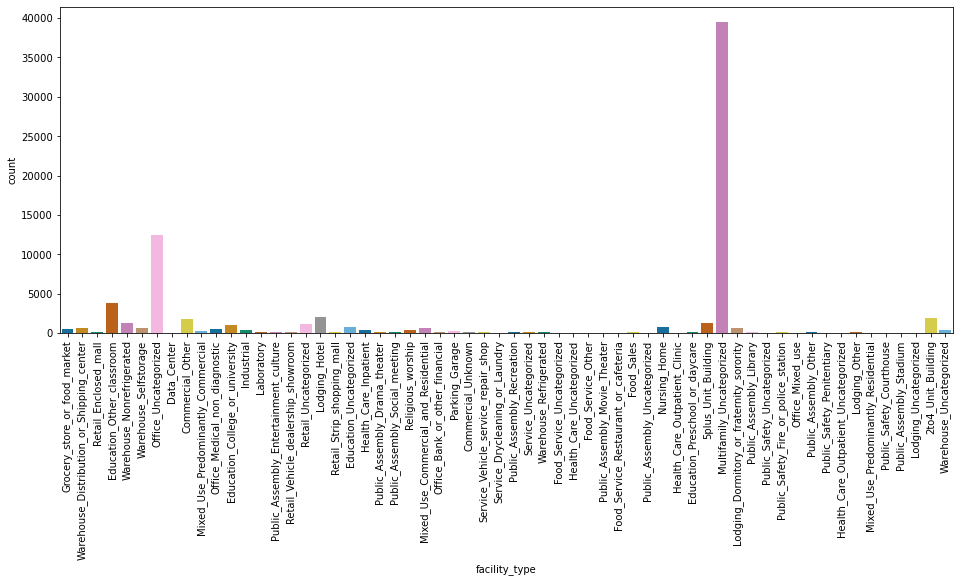

In [24]:
# lets check a countplot of facility_type
def drawplot(col):
  plt.figure(figsize=(16,6))
  sns.countplot(train[col], palette = "colorblind")
  plt.xticks(rotation="vertical")

view = ["facility_type"]
for col in view:
  drawplot(col)

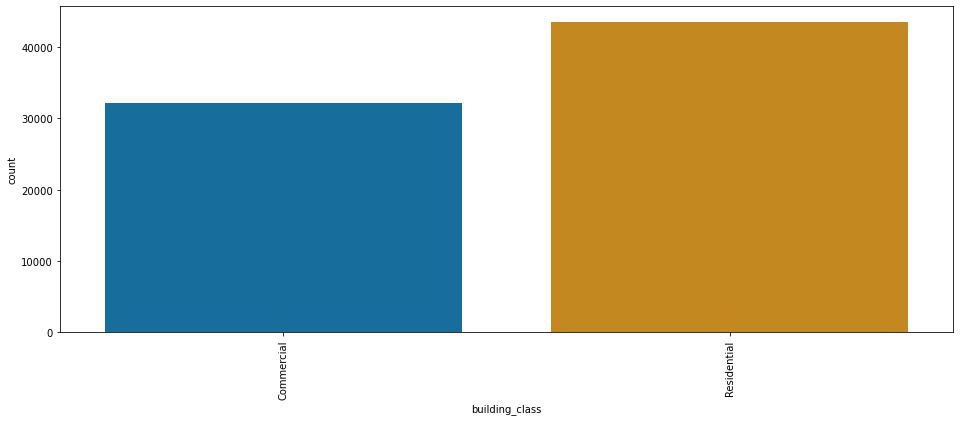

In [15]:
# lets check the binary count of "building_class"
def drawplot(col):
  plt.figure(figsize=(16,6))
  sns.countplot(train[col], palette = "colorblind")
  plt.xticks(rotation="vertical")

view = ["building_class"]
for col in view:
  drawplot(col)

To conclude:

1 indicates a commercial property

0 indicates a residential property

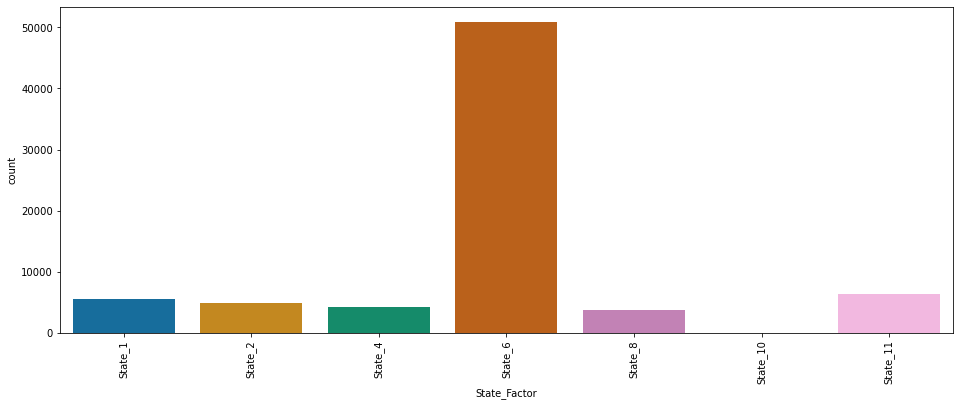

In [17]:
# lets check the binary count of "State_Factor"
def drawplot(col):
  plt.figure(figsize=(16,6))
  sns.countplot(train[col], palette = "colorblind")
  plt.xticks(rotation="vertical")

view = ["State_Factor"]
for col in view:
  drawplot(col)

here we can see that most of the data is present from State_6

# Pandas get_dummies()
As the "building_class" only has 2 unique values we can use the Pandas get_dummies() function. This will create a binary variable for "Commerical" and "Residential."

In [25]:
train = pd.get_dummies(train, columns=["building_class"], drop_first=True)

# Masking Data
As we can see that we have 60 categories praesent in Facility_type column.
Removing duplicate features and features which are very similar to others in the dataframe 
becomes very necessary step to convert it Numeric feature.
There might be cases where the features in dataset are either duplicated or very similar, 
an example of very similar feature is 'Lodging' and 'lodging' means there might be the possibility that 
category Loging is present in two ways in our dataset some by Upper case & others by lowercase. 

In [26]:
# I am using str.contains to mask the rows that contain a specific string and then overwrite with the new value:
train.loc[train['facility_type'].str.contains('Lodging'), 'facility_type'] = 'lodging'
train.loc[train['facility_type'].str.contains('Education'), 'facility_type'] = 'education'
train.loc[train['facility_type'].str.contains('Health'), 'facility_type'] = 'healthcare'
train.loc[train['facility_type'].str.contains('Public_Safety'), 'facility_type'] = 'public_safety'
train.loc[train['facility_type'].str.contains('Public_Assembly'), 'facility_type'] = 'public_assembly'
train.loc[train['facility_type'].str.contains('Food', case = False), 'facility_type'] = 'food'
train.loc[train['facility_type'].str.contains('Retail'), 'facility_type'] = 'retail'
train.loc[train['facility_type'].str.contains('Warehouse'), 'facility_type'] = 'warehouse'
train.loc[train['facility_type'].str.contains('Service'), 'facility_type'] = 'service'
train.loc[train['facility_type'].str.contains('Commercial'), 'facility_type'] = 'commercial'
train.loc[train['facility_type'].str.contains('Office'), 'facility_type'] = 'office'
train.loc[train['facility_type'].str.contains('Residential'), 'facility_type'] = 'Multifamily_Uncategorized'
train.loc[train['facility_type'].str.contains('Building'), 'facility_type'] = 'Multifamily_Uncategorized'
train.loc[train['facility_type'].str.contains('Lab'), 'facility_type'] = 'healthcare'
train.loc[train['facility_type'].str.contains('Multifamily'), 'facility_type'] = 'Multifamily'
train.loc[train['facility_type'].str.contains('Data'), 'facility_type'] = 'commercial'
train.loc[train['facility_type'].str.contains('service'), 'facility_type'] = 'commercial'
train.loc[train['facility_type'].str.contains('Parking'), 'facility_type'] = 'commercial'

# After Masking Facility_Type column of the dataset we are left with 14 categories in this column which is a considerable drop from 60 we had in the beginning to 14 categories.



In [27]:
print(train['facility_type'].nunique())

14


# There are 2ways to group the data column 'facility_type'
--Only use the top 10

--grouping similar features 

During the teams discussions we are going to group these categories by the following:

Multifamily_Uncategorized

Office_Uncategorized

Educational_Other_classroom

Lodging_Hotel

Other

check the below code for grouping and also check the dataset then we are easily able to do the grouping as you can see there is category 'Other' now present in our 'Facility_type' column


In [28]:
values = ["Multifamily","office", "education", "commercial","warehouse","lodging","retail"]
train.loc[~train["facility_type"].isin(values), "facility_type"] = "Other"

train.head(6)




Year_Factor State_Factor facility_type  floor_area  year_built  \
0            1      State_1         Other     61242.0      1942.0   
1            1      State_1     warehouse    274000.0      1955.0   
2            1      State_1        retail    280025.0      1951.0   
3            1      State_1     education     55325.0      1980.0   
4            1      State_1     warehouse     66000.0      1985.0   
5            1      State_1     warehouse    119900.0      1956.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   
5                 NaN        2.4                36              50.5   

   january_max_temp  ...  days_above_90F  days_above_100F  days_above_110F  \
0                68  ...               0                0                0   
1                68  ...               0                0                0   
2                68  ...               0                0                0   
3                68  ...               0                0                0   
4                68  ...               0                0                0   
5                68  ...               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   
5                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  building_class_Residential  
0            NaN  248.682615   0                           0  
1           12.0   26.500150   1                           0  
2           12.0   24.693619   2                           0  
3           12.0   48.406926   3                           0  
4            NaN    3.899395   4                           0  
5            NaN    6.597715   5                           0  

[6 rows x 64 columns]

# After grouping we are able to reduce the category type further from 14 to 8

In [30]:
print(train['facility_type'].nunique())

8


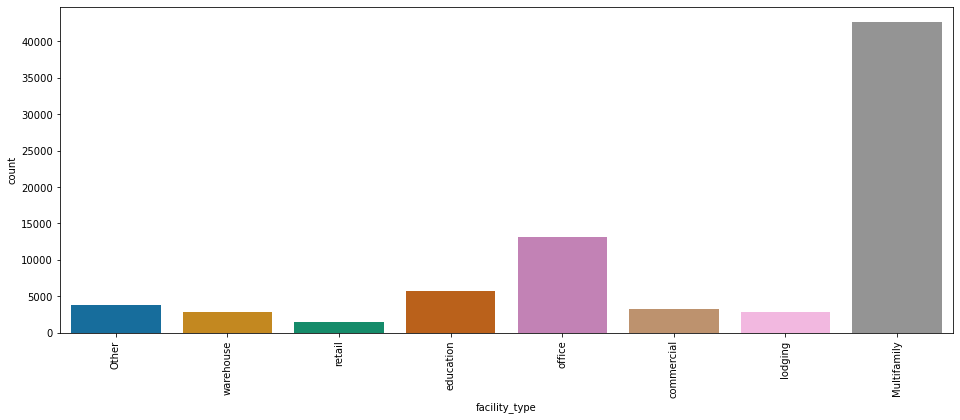

In [33]:
# lets check a countplot of these new classes
def drawplot(col):
  plt.figure(figsize=(16,6))
  sns.countplot(train[col], palette = "colorblind")
  plt.xticks(rotation="vertical")

view = ["facility_type"]
for col in view:
  drawplot(col)

# Now we are using binary encoder to encode the Categorical columns 'facility_type','State_Factor' as
* Binary encoders are efficient when large number of categories are present in tha data
* Reduce curse of dimentionality thereby improves the performance & learning of the model

In [31]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['facility_type','State_Factor'],return_df=True)
#Fit and Transform Data 
data_encoded=encoder.fit_transform(train) 
data_encoded


Year_Factor  State_Factor_0  State_Factor_1  State_Factor_2  \
0                1               0               0               1   
1                1               0               0               1   
2                1               0               0               1   
3                1               0               0               1   
4                1               0               0               1   
...            ...             ...             ...             ...   
75752            6               1               1               1   
75753            6               1               1               1   
75754            6               1               1               1   
75755            6               1               1               1   
75756            6               1               1               1   

       facility_type_0  facility_type_1  facility_type_2  facility_type_3  \
0                    0                0                0                1   
1                    0                0                1                0   
2                    0                0                1                1   
3                    0                1                0                0   
4                    0                0                1                0   
...                ...              ...              ...              ...   
75752                0                1                0                1   
75753                1                0                0                0   
75754                0                1                1                0   
75755                0                1                1                0   
75756                1                0                0                0   

       floor_area  year_built  ...  days_above_90F  days_above_100F  \
0         61242.0      1942.0  ...               0                0   
1        274000.0      1955.0  ...               0                0   
2        280025.0      1951.0  ...               0                0   
3         55325.0      1980.0  ...               0                0   
4         66000.0      1985.0  ...               0                0   
...           ...         ...  ...             ...              ...   
75752     20410.0      1995.0  ...               3                0   
75753     40489.0      1910.0  ...               3                0   
75754     28072.0      1917.0  ...               0                0   
75755     53575.0      2012.0  ...               0                0   
75756     23888.0      1974.0  ...               0                0   

       days_above_110F  direction_max_wind_speed  direction_peak_wind_speed  \
0                    0                       1.0                        1.0   
1                    0                       1.0                        NaN   
2                    0                       1.0                        NaN   
3                    0                       1.0                        NaN   
4                    0                       1.0                        1.0   
...                ...                       ...                        ...   
75752                0                       NaN                        NaN   
75753                0                       NaN                        NaN   
75754                0                       NaN                        NaN   
75755                0                       NaN                        NaN   
75756                0                       NaN                        NaN   

       max_wind_speed  days_with_fog    site_eui     id  \
0                 1.0            NaN  248.682615      0   
1                 1.0           12.0   26.500150      1   
2                 1.0           12.0   24.693619      2   
3                 1.0           12.0   48.406926      3   
4                 1.0            NaN    3.899395      4   
...               ...            ...         ...    ...   
75752             NaN     

So now we are able to successfully encode our data using 2 different techniques

References :
    https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/